In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from PIL import Image
import imageio

Remark: Remove the np.meshgrid. 

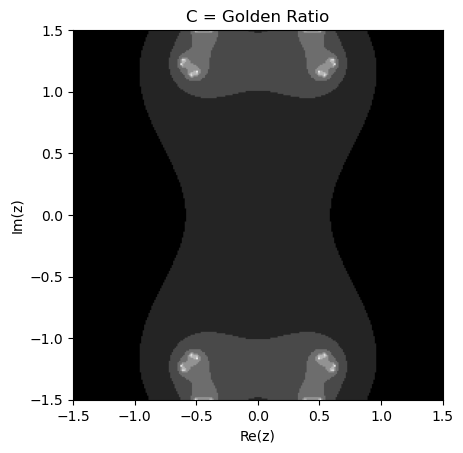

In [76]:
def julia(c, z, max_iter=16, z_abs_max=1000):
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) >= z_abs_max:
            return i    
    return max_iter


xmin, xmax, ymin, ymax = -1.5, 1.5, -1.5, 1.5
npts = 255

x = np.linspace(xmin, xmax, npts)
y = np.linspace(ymin, ymax, npts)

C = 1.61803398875

# Generate the Julia set
julia_set = np.zeros((npts, npts),dtype='uint8')
for i in range(npts):
    for j in range(npts):
        z_0 = x[j] - 1.j*y[i]
        julia_set[i, j] = julia(C,z_0)

# Plot the Julia set
plt.imshow(julia_set, extent=(xmin, xmax, ymin, ymax),cmap='gray')
plt.title('C = Golden Ratio')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

In [81]:
frames = []
x = np.linspace(xmin, xmax, npts)
y = np.linspace(ymin, ymax, npts)

a_space = np.exp(1j*np.linspace(0,2*np.pi,250))
for a in a_space:
        julia_set = np.zeros((npts, npts),dtype='uint8')
        C = a
        for i in range(npts):
            for j in range(npts):
                z_0 = x[j] + 1.j * y[i]
                julia_set[i, j] = julia(C,z_0)

        buf = io.BytesIO()
        plt.imshow(julia_set, extent=(xmin, xmax, ymin, ymax),cmap='gray')
        plt.title(f'C = exp{np.round(a,2)}')
        plt.xlabel('Re(z)')
        plt.ylabel('Im(z)')
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        frames.append(Image.open(buf))

In [78]:
imageio.mimsave('julia_set.gif', frames, duration=0.1)

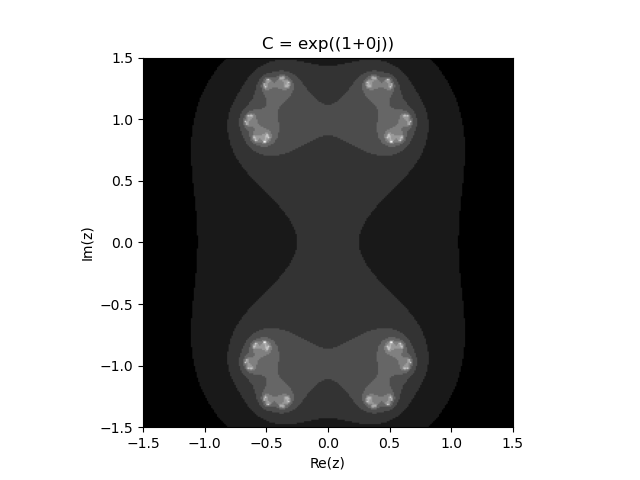

In [79]:
import IPython

IPython.display.Image(filename='julia_set.gif')